# hyer page 584. 617

In [198]:
# setup 
import numpy as np
import sympy as sp
from sympy import *
from pprint import pprint
init_printing(use_latex='mathjax')
from mechpy.composites import import_matprops
#get_ipython().magic('matplotlib')  # seperate window
get_ipython().magic('matplotlib inline') # inline plotting

In [199]:
# declare symbols for equation generation
th,x,y,z,q,a,b,C1,C2,C3,C4,C5,C6 = symbols('th,x,y,z,q,a,b,C1,C2,C3,C4,C5,C6')

A11,A22,A66,A12,A16,A26,A66 = symbols('A11,A22,A66,A12,A16,A26,A66')
B11,B22,B66,B12,B16,B26,B66 = symbols('B11,B22,B66,B12,B16,B26,B66')
D11,D22,D66,D12,D16,D26,D66 = symbols('D11,D22,D66,D12,D16,D26,D66')
Nx,Ny,Nxy,Mx,My,Mxy = symbols('Nx,Ny,Nxy,Mx,My,Mxy')

##if use this, then reference  the function as u0(x), example  diff(u0(x),x,2)

u0 = Function('u0')(x,y)
v0 = Function('v0')(x,y)
w0 = Function('w0')(x,y)

In [200]:
w0 = A11 / (A11*D11-B11**2) * ( q*x**4/24 - C2*x**3/6 - (C3- B11/A11*C1)*x**2/2 - C5*x - C6 )
w0

    ⎛                              2 ⎛     B₁₁⋅C₁⎞⎞
    ⎜      3                  4   x ⋅⎜C₃ - ──────⎟⎟
    ⎜  C₂⋅x                q⋅x       ⎝      A₁₁  ⎠⎟
A₁₁⋅⎜- ───── - C₅⋅x - C₆ + ──── - ────────────────⎟
    ⎝    6                  24           2        ⎠
───────────────────────────────────────────────────
                                2                  
                   A₁₁⋅D₁₁ - B₁₁                   

In [201]:
u0 = D11/(A11*D11 - B11**2 ) *C1*x + B11/(A11*D11-B11**2) * (q*x**3/6-C2*x**2/2-C3*x)+C4/A11
u0

    ⎛      2             3⎞                       
    ⎜  C₂⋅x           q⋅x ⎟                       
B₁₁⋅⎜- ───── - C₃⋅x + ────⎟                       
    ⎝    2             6  ⎠      C₁⋅D₁₁⋅x       C₄
─────────────────────────── + ────────────── + ───
                    2                      2   A₁₁
       A₁₁⋅D₁₁ - B₁₁          A₁₁⋅D₁₁ - B₁₁       

In [202]:
Nx = C1
Mx = -q*x**2/2+C2*x+C3

# simple support, pin pin
bc1 = Mx.subs(x,+a/2)
bc2 = Mx.subs(x,-a/2)
bc3 = u0.subs(x,+a/2)
bc4 = u0.subs(x,-a/2)
bc5 = w0.subs(x,+a/2)
bc6 = w0.subs(x,-a/2)

# pin-roller
#bc1 = Mx.subs(x,+a/2)
#bc2 = Mx.subs(x,-a/2)
#bc3 = Nx.subs(x,+a/2)
#bc4 = u0.subs(x,-a/2)
#bc5 = w0.subs(x,+a/2)
#bc6 = w0.subs(x,-a/2)

# fixed-pin
#bc1 = u0.subs(x,+a/2)
#bc2 = w0.subs(x,+a/2)
#bc3 = w0.diff(x).subs(x,+a/2)
#bc4 = u0.subs(x,-a/2)
#bc5 = Mx.subs(x,-a/2)
#bc6 = w0.subs(x,-a/2)

In [203]:
C = solve([bc1,bc2,bc3,bc4,bc5,bc6],[C1,C2,C3,C4,C5,C6])
C

⎧         2                2                       4   ⎛                  2⎞⎫
⎪    B₁₁⋅a ⋅q             a ⋅q                    a ⋅q⋅⎝-5⋅A₁₁⋅D₁₁ + 4⋅B₁₁ ⎠⎪
⎨C₁: ────────, C₂: 0, C₃: ────, C₄: 0, C₅: 0, C₆: ──────────────────────────⎬
⎪     12⋅D₁₁               8                             384⋅A₁₁⋅D₁₁        ⎪
⎩                                                                           ⎭

In [204]:
a_ = 2
b_ = 10
q_ = -5
ABD= np.array([[  1.0240e+08,   1.8945e+07,  -1.8626e-09,  -5.4570e-12,  -1.3642e-12,   0.0000e+00],
               [  1.8945e+07,   1.6250e+07,  -9.3132e-10,  -1.3642e-12,  -1.3642e-12,   0.0000e+00],
               [ -1.8626e-09,  -9.3132e-10,   2.0191e+07,   0.0000e+00,   1.1369e-13,  -1.3642e-12],
               [ -5.4570e-12,  -1.3642e-12,   0.0000e+00,   5.7792e+00,   1.7657e+00,   1.2611e+00],
               [ -1.3642e-12,  -1.3642e-12,   0.0000e+00,   1.7657e+00,   1.2561e+00,   4.1768e-01],
               [  0.0000e+00,   1.1369e-13,  -1.3642e-12,   1.2611e+00,   4.1768e-01,   1.8498e+00]])
A = ABD[0:3,0:3]
B = ABD[0:3,3:6]
D = ABD[3:6,3:6]
A11_ = A[0,0]
B11_ = B[0,0]
D11_ = D[0,0]

In [205]:
C1_ = C[C1].subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_})
C2_ = C[C2].subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_})
C3_ = C[C3].subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_})
C4_ = C[C4].subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_})
C5_ = C[C5].subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_})
C6_ = C[C6].subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_})

In [206]:
u0.subs({C1:C[C1] , C2:C[C2], C3:C[C3], C4:C[C4], C5:C[C5], C6:C[C6]})

                          ⎛   2          3⎞
                          ⎜  a ⋅q⋅x   q⋅x ⎟
          2           B₁₁⋅⎜- ────── + ────⎟
     B₁₁⋅a ⋅q⋅x           ⎝    8       6  ⎠
─────────────────── + ─────────────────────
   ⎛             2⎞                    2   
12⋅⎝A₁₁⋅D₁₁ - B₁₁ ⎠       A₁₁⋅D₁₁ - B₁₁    

In [207]:
w0sym = w0.subs({C1:C[C1] , C2:C[C2], C3:C[C3], C4:C[C4], C5:C[C5], C6:C[C6]})
collect(w0sym,x)

    ⎛   4      ⎛   2        2  2   ⎞    4   ⎛                  2⎞⎞
    ⎜q⋅x     2 ⎜  a ⋅q   B₁₁ ⋅a ⋅q ⎟   a ⋅q⋅⎝-5⋅A₁₁⋅D₁₁ + 4⋅B₁₁ ⎠⎟
A₁₁⋅⎜──── + x ⋅⎜- ──── + ──────────⎟ - ──────────────────────────⎟
    ⎝ 24       ⎝   16    24⋅A₁₁⋅D₁₁⎠          384⋅A₁₁⋅D₁₁        ⎠
──────────────────────────────────────────────────────────────────
                                       2                          
                          A₁₁⋅D₁₁ - B₁₁                           

In [208]:
u0f = u0.subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_,C1:C1_ , C2:C2_, C3:C3_, C4:C4_, C5:C5_, C6:C6_})
u0f

                      3                            
7.68431265356797e-21⋅x  - - -7.68431265356797e-21⋅x

In [209]:
w0f = w0.subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_,C1:C1_ , C2:C2_, C3:C3_, C4:C4_, C5:C5_, C6:C6_})
w0f

                         4                      2                    
- - -0.0360488187523071⋅x  + 0.216292912513843⋅x  - 0.180244093761536

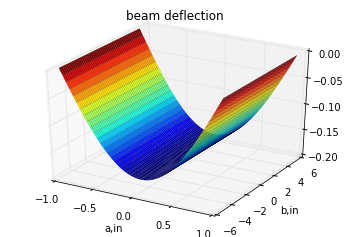

In [210]:
# Sympy 3d plots
from sympy.plotting import plot3d
w0 = w0f.subs({a:a_, b:b_, q:q_, A11:A11_, B11:B11_, D11:D11_})
u0 = u0f.subs({a:a_, b:b_, q:q_, A11:A11_, B11:B11_, D11:D11_})
plot3d(w0, (x,-a_/2,a_/2), (y,-b_/2,b_/2), title='beam deflection', xlabel='a,in', ylabel='b,in', zlabel='z,in')

In [211]:
# Strain
kapx = diff(w0,x,2)
epsx = diff(u0,x)
epsx

                      2                       
2.30529379607039e-20⋅x  - 7.68431265356797e-21